In [17]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import os
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import sklearn.metrics
from sklearn.linear_model import LassoLarsCV

In [18]:
os.chdir("C:/Demo spy/Decision tree/")

In [19]:
"""
Data Engineering and Analysis
"""
#Load the dataset

AH_data = pd.read_csv("tree_addhealth.csv")

In [20]:
AH_data.head()

,BIO_SEX,HISPANIC,WHITE,BLACK,NAMERICAN,ASIAN,age,TREG1,ALCEVR1,ALCPROBS1,...,ESTEEM1,VIOL1,PASSIST,DEVIANT1,SCHCONN1,GPA1,EXPEL1,FAMCONCT,PARACTV,PARPRES
0,2.0,0.0,0.0,1.0,0.0,0.0,NaN,0.0,1.0,2,...,47.0,4.0,0,5.0,NaN,NaN,0.0,24.3,8.0,15.0
1,2.0,0.0,0.0,1.0,0.0,0.0,19.427397,1.0,1.0,1,...,35.0,1.0,0,5.0,22.0,2.333333,0.0,23.3,9.0,15.0
2,1.0,0.0,1.0,0.0,0.0,0.0,NaN,0.0,0.0,0,...,45.0,0.0,0,1.0,30.0,2.250000,0.0,24.3,3.0,15.0
3,1.0,0.0,0.0,1.0,0.0,0.0,20.430137,1.0,0.0,0,...,47.0,4.0,1,4.0,19.0,2.000000,0.0,18.7,6.0,14.0
4,2.0,0.0,0.0,1.0,0.0,0.0,NaN,0.0,1.0,0,...,39.0,0.0,0,5.0,32.0,3.000000,0.0,20.0,9.0,6.0


In [21]:
#data_clean = AH_data.dropna()

In [22]:
data_clean.dtypes

BIO_SEX      float64
HISPANIC     float64
WHITE        float64
BLACK        float64
NAMERICAN    float64
ASIAN        float64
AGE          float64
TREG1        float64
ALCEVR1      float64
ALCPROBS1      int64
MAREVER1       int64
COCEVER1       int64
INHEVER1       int64
CIGAVAIL     float64
DEP1         float64
ESTEEM1      float64
VIOL1        float64
PASSIST        int64
DEVIANT1     float64
SCHCONN1     float64
GPA1         float64
EXPEL1       float64
FAMCONCT     float64
PARACTV      float64
PARPRES      float64
MALE           int64
dtype: object

In [23]:
data_clean.describe()

,BIO_SEX,HISPANIC,WHITE,BLACK,NAMERICAN,ASIAN,AGE,TREG1,ALCEVR1,ALCPROBS1,...,VIOL1,PASSIST,DEVIANT1,SCHCONN1,GPA1,EXPEL1,FAMCONCT,PARACTV,PARPRES,MALE
count,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,...,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000
mean,1.521093,0.111038,0.683279,0.236066,0.036284,0.040437,16.493052,0.176393,0.527432,0.369180,...,1.618579,0.102514,2.645027,28.360656,2.815647,0.040219,22.570557,6.290710,13.398033,0.478907
std,0.499609,0.314214,0.465249,0.424709,0.187017,0.197004,1.552174,0.381196,0.499302,0.894947,...,2.593230,0.303356,3.520554,5.156385,0.770167,0.196493,2.614754,3.360219,2.085837,0.499609
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.676712,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,6.000000,1.000000,0.000000,6.300000,0.000000,3.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.254795,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,25.000000,2.250000,0.000000,21.700000,4.000000,12.000000,0.000000
50%,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,16.509589,0.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,29.000000,2.750000,0.000000,23.700000,6.000000,14.000000,0.000000
75%,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,17.679452,0.000000,1.000000,0.000000,...,2.000000,0.000000,4.000000,32.000000,3.500000,0.000000,24.300000,9.000000,15.000000,1.000000
max,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.512329,1.000000,1.000000,6.000000,...,19.000000,1.000000,27.000000,38.000000,4.000000,1.000000,25.000000,18.000000,15.000000,1.000000


In [24]:

#upper-case all DataFrame column names
AH_data.columns = map(str.upper, AH_data.columns)

# Data Management
data_clean = AH_data.dropna()
recode1 = {1:1, 2:0}
data_clean['MALE']= data_clean['BIO_SEX'].map(recode1)

C:\Users\le dung\AppData\Local\Temp\ipykernel_18272\3655083964.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['MALE']= data_clean['BIO_SEX'].map(recode1)


In [25]:
"""
Modeling and Prediction
"""
#Split into training and testing sets

#select predictor variables and target variable as separate data sets  
predvar= data_clean[['MALE','HISPANIC','WHITE','BLACK','NAMERICAN','ASIAN','AGE','ALCEVR1','ALCPROBS1','MAREVER1','COCEVER1','INHEVER1','CIGAVAIL','DEP1',
'ESTEEM1','VIOL1','PASSIST','DEVIANT1','GPA1','EXPEL1','FAMCONCT','PARACTV','PARPRES']]
target = data_clean.SCHCONN1
 
# standardize predictors to have mean=0 and sd=1
predictors= predvar.copy()
from sklearn import preprocessing
predictors['MALE']=preprocessing.scale(predictors['MALE'].astype('float64'))
predictors['HISPANIC']=preprocessing.scale(predictors['HISPANIC'].astype('float64'))
predictors['WHITE']=preprocessing.scale(predictors['WHITE'].astype('float64'))
predictors['NAMERICAN']=preprocessing.scale(predictors['NAMERICAN'].astype('float64'))
predictors['ASIAN']=preprocessing.scale(predictors['ASIAN'].astype('float64'))
predictors['AGE']=preprocessing.scale(predictors['AGE'].astype('float64'))
predictors['ALCEVR1']=preprocessing.scale(predictors['ALCEVR1'].astype('float64'))
predictors['ALCPROBS1']=preprocessing.scale(predictors['ALCPROBS1'].astype('float64'))
predictors['MAREVER1']=preprocessing.scale(predictors['MAREVER1'].astype('float64'))
predictors['COCEVER1']=preprocessing.scale(predictors['COCEVER1'].astype('float64'))
predictors['INHEVER1']=preprocessing.scale(predictors['INHEVER1'].astype('float64'))
predictors['CIGAVAIL']=preprocessing.scale(predictors['CIGAVAIL'].astype('float64'))
predictors['DEP1']=preprocessing.scale(predictors['DEP1'].astype('float64'))
predictors['ESTEEM1']=preprocessing.scale(predictors['ESTEEM1'].astype('float64'))
predictors['VIOL1']=preprocessing.scale(predictors['VIOL1'].astype('float64'))
predictors['PASSIST']=preprocessing.scale(predictors['PASSIST'].astype('float64'))
predictors['DEVIANT1']=preprocessing.scale(predictors['DEVIANT1'].astype('float64'))
predictors['GPA1']=preprocessing.scale(predictors['GPA1'].astype('float64'))
predictors['EXPEL1']=preprocessing.scale(predictors['EXPEL1'].astype('float64'))
predictors['FAMCONCT']=preprocessing.scale(predictors['FAMCONCT'].astype('float64'))
predictors['PARACTV']=preprocessing.scale(predictors['PARACTV'].astype('float64'))
predictors['PARPRES']=preprocessing.scale(predictors['PARPRES'].astype('float64'))
# predictors = data_clean[['BIO_SEX','HISPANIC','WHITE','BLACK','NAMERICAN','ASIAN']]


In [26]:
# split data into train and test sets
pred_train, pred_test, tar_train, tar_test = train_test_split(predictors, target, 
                                                              test_size=.3, random_state=123)

# specify the lasso regression model
model=LassoLarsCV(cv=10, precompute=False).fit(pred_train,tar_train)

# print variable names and regression coefficients
dict(zip(predictors.columns, model.coef_))

{'MALE': -0.22778452646120412,
 'HISPANIC': 0.223547555141568,
 'WHITE': 0.0,
 'BLACK': -0.6154087621132441,
 'NAMERICAN': -0.12037220641245959,
 'ASIAN': 0.2052785315120928,
 'AGE': 0.23685098303942415,
 'ALCEVR1': -0.33221712715179197,
 'ALCPROBS1': 0.0,
 'MAREVER1': -0.16215211348623315,
 'COCEVER1': -0.20581770723040757,
 'INHEVER1': 0.0,
 'CIGAVAIL': -0.11481381083002493,
 'DEP1': -0.8642731410408718,
 'ESTEEM1': 1.1005610615839236,
 'VIOL1': -0.6441405963365192,
 'PASSIST': 0.0,
 'DEVIANT1': -0.4119047878948389,
 'GPA1': 0.6733289684906747,
 'EXPEL1': -0.08611617855310838,
 'FAMCONCT': 0.521516539380227,
 'PARACTV': 0.30874476471041923,
 'PARPRES': 0.0}

C:\Users\le dung\AppData\Local\Temp\ipykernel_18272\2109930844.py:12: RuntimeWarning: divide by zero encountered in log10
  m_log_alphascv = -np.log10(model.cv_alphas_)


Text(0.5, 1.0, 'Mean squared error on each fold')

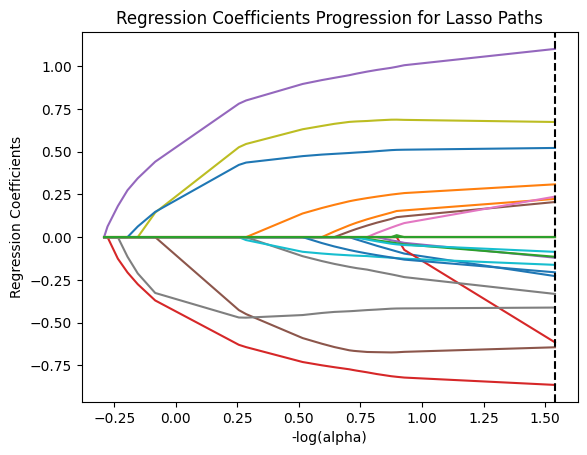

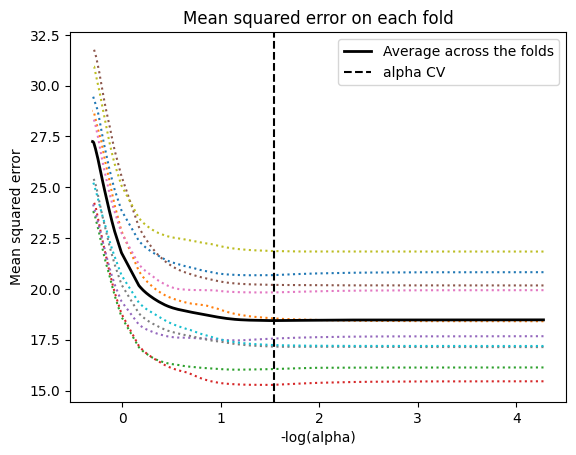

In [30]:
# plot coefficient progression
m_log_alphas = -np.log10(model.alphas_)
ax = plt.gca()
plt.plot(m_log_alphas, model.coef_path_.T)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
            label='alpha CV')
plt.ylabel('Regression Coefficients')
plt.xlabel('-log(alpha)')
plt.title('Regression Coefficients Progression for Lasso Paths')

# plot mean square error for each fold
m_log_alphascv = -np.log10(model.cv_alphas_)
plt.figure()

plt.plot(m_log_alphascv, model.mse_path_, ':')
plt.plot(m_log_alphascv, model.mse_path_.mean(axis=-1), 'k',
         label='Average across the folds', linewidth=2)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
            label='alpha CV')
plt.legend()
plt.xlabel('-log(alpha)')
plt.ylabel('Mean squared error')
plt.title('Mean squared error on each fold')

In [28]:
# MSE from training and test data
from sklearn.metrics import mean_squared_error
train_error = mean_squared_error(tar_train, model.predict(pred_train))
test_error = mean_squared_error(tar_test, model.predict(pred_test))
print ('training data MSE')
print(train_error)
print ('test data MSE')
print(test_error)

training data MSE
18.141727811403108
test data MSE
17.30342193917446


In [29]:
# R-square from training and test data
rsquared_train=model.score(pred_train,tar_train)
rsquared_test=model.score(pred_test,tar_test)
print ('training data R-square')
print(rsquared_train)
print ('test data R-square')
print(rsquared_test)

training data R-square
0.33386246983770296
test data R-square
0.30957603314579507
